In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 64.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 111.1 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 103.1 MB/s eta 0:00:00


In [3]:
!pip install seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = "global_shark_attacks.csv"
df = pd.read_csv(file_path)

In [6]:
display(df.head())

,date,year,type,country,area,location,activity,name,sex,age,fatal_y_n,time,species
0,2023-05-13,2023.0,Unprovoked,AUSTRALIA,South Australia,Elliston,Surfing,Simon Baccanello,M,46,Y,10h10,White shark
1,2023-04-29,2023.0,Unprovoked,AUSTRALIA,Western Australia,"Yallingup, Busselton",Swimming,male,M,NaN,N,11h20,1m shark
2,2022-10-07,2022.0,Unprovoked,AUSTRALIA,Western Australia,Port Hedland,Spearfishing,Robbie Peck,M,38,N,11h30,Bull shark
3,2021-10-04,2021.0,Unprovoked,USA,Florida,"Fort Pierce State Park, St. Lucie County",Surfing,Truman Van Patrick,M,25.0,N,NaN,NaN
4,2021-10-03,2021.0,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Swimming,male,M,NaN,N,12h00,NaN


In [7]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
valid_ages = df['age'].dropna()
print("Edat mínima:", valid_ages.min())
print("Edat màxima:", valid_ages.max())

Edat mínima: 1.0
Edat màxima: 87.0


Registres des del any: 1518 fins a el any: 2023

Atacs per segle:
year
1500       6
1600       6
1700      31
1800     571
1900    3502
2000    2639
Name: count, dtype: int64


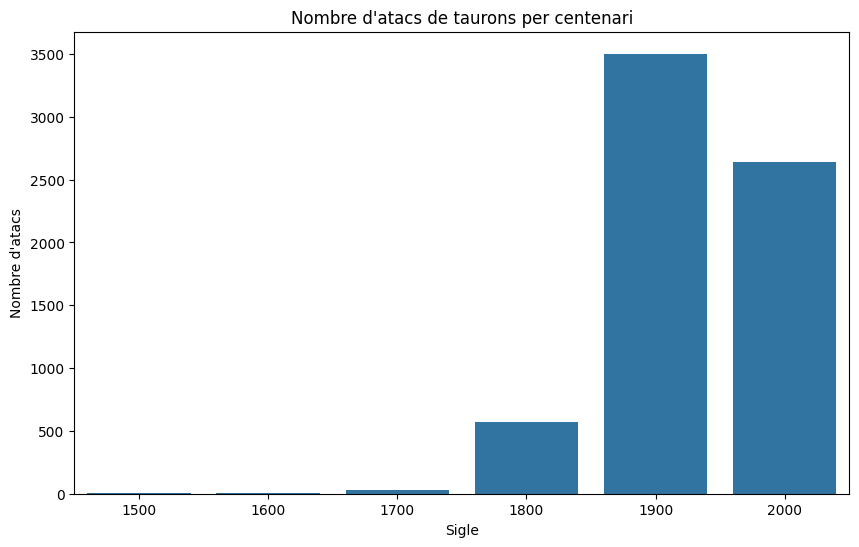

In [62]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
valid_years = df['year'].dropna().astype(int)
valid_years = valid_years[valid_years != 1]
valid_years = valid_years[valid_years != 1000]
valid_years = valid_years[valid_years != 1500]
print("Registres des del any:", valid_years.min(), "fins a el any:", valid_years.max())
print()
centuries = (valid_years // 100) * 100
century_counts = centuries.value_counts().sort_index()
print("Atacs per segle:")
print(century_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=century_counts.index, y=century_counts.values)
plt.title("Nombre d'atacs de taurons per centenari")
plt.xlabel("Sigle")
plt.ylabel("Nombre d'atacs")
plt.show()

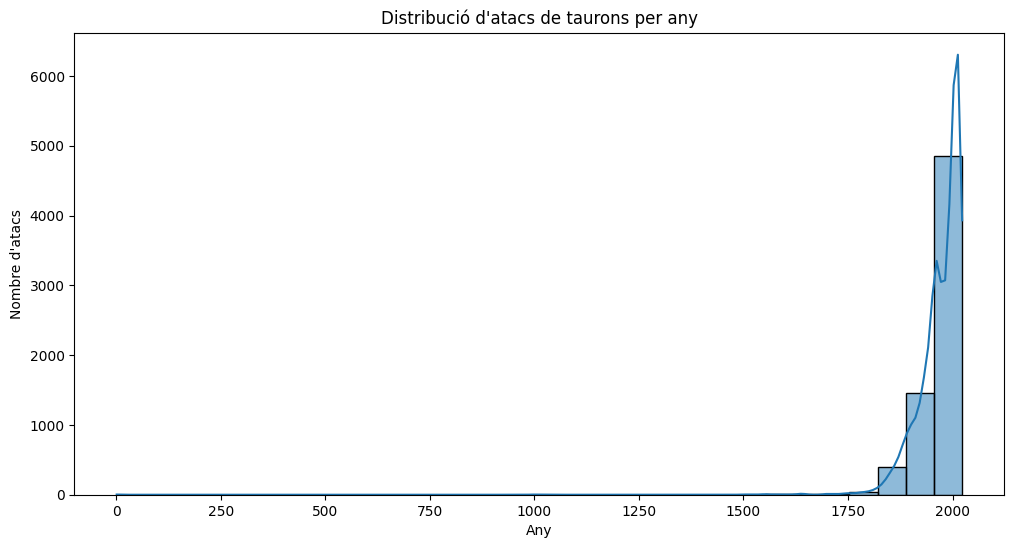

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df['year'], bins=30, kde=True)
plt.title("Distribució d'atacs de taurons per any")
plt.xlabel("Any")
plt.ylabel("Nombre d'atacs")
plt.show()

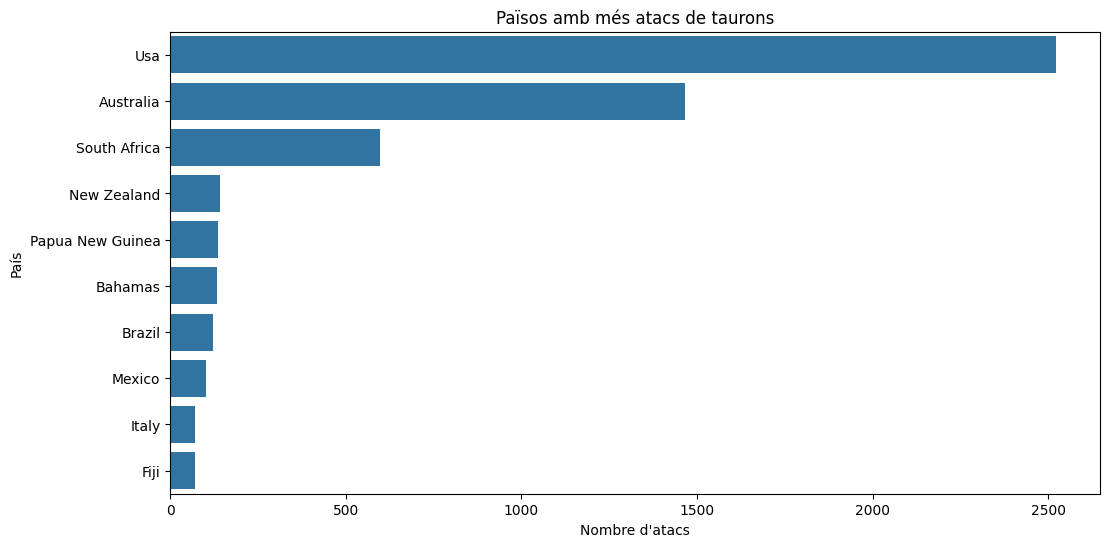

In [43]:
plt.figure(figsize=(12,6))
df['country'] = df['country'].str.title()
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Països amb més atacs de taurons")
plt.xlabel("Nombre d'atacs")
plt.ylabel("País")
plt.show()

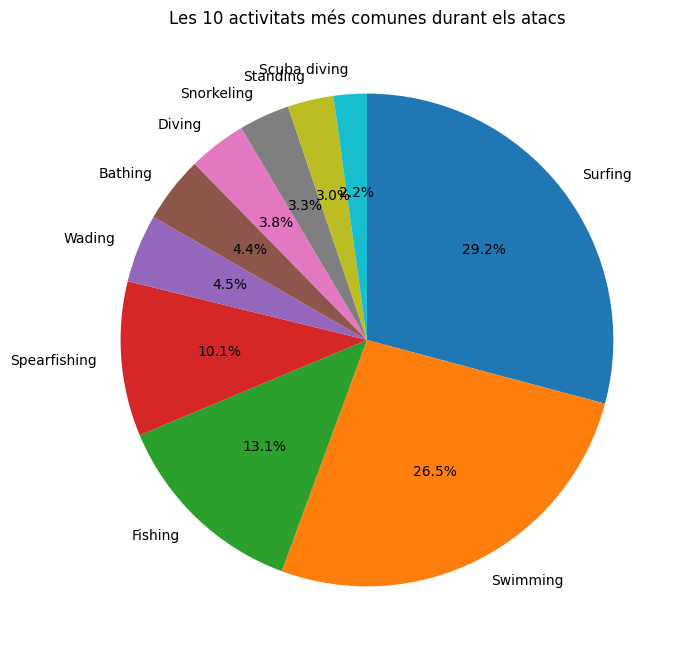

In [46]:
top_activitats = df['activity'].value_counts().head(10)
plt.figure(figsize=(8,8))
plt.pie(top_activitats.values, labels=top_activitats.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title("Les 10 activitats més comunes durant els atacs")
plt.show()

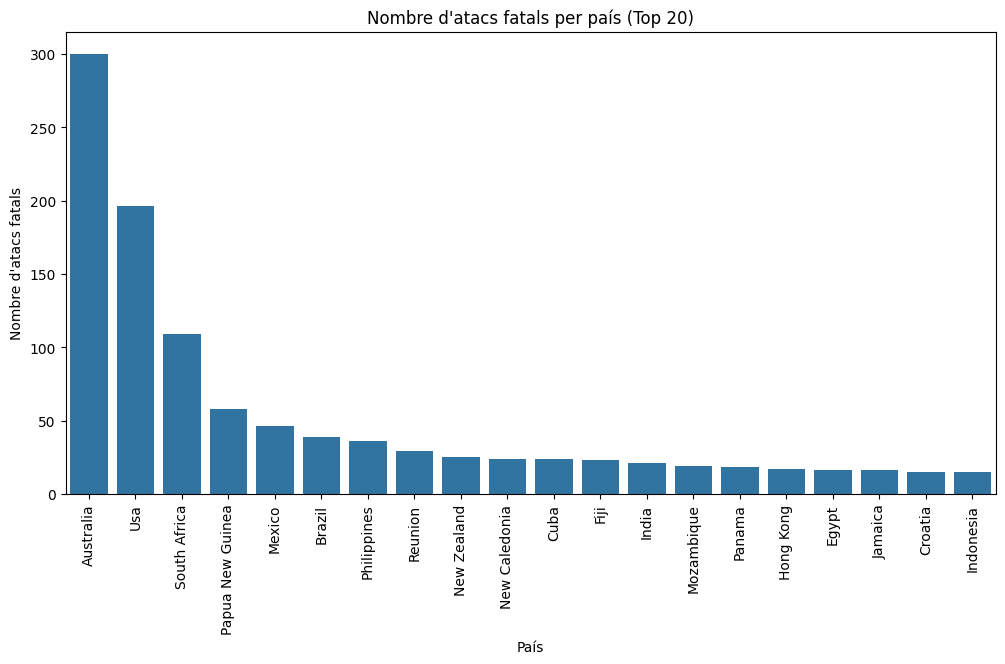

El país amb més atacs fatals és Australia amb 300 atacs fatals.


In [61]:
df['fatal_y_n'] = df['fatal_y_n'].str.upper()
fatal_df = df[df['fatal_y_n'] == 'Y'].copy()
fatal_df = fatal_df[fatal_df['country'].notna()]
fatal_by_country = fatal_df['country'].value_counts().sort_values(ascending=False)
top_20_fatal = fatal_by_country.head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_20_fatal.index, y=top_20_fatal.values)
plt.title("Nombre d'atacs fatals per país (Top 20)")
plt.xlabel("País")
plt.ylabel("Nombre d'atacs fatals")
plt.xticks(rotation=90)
plt.show()
most_fatal_country = fatal_by_country.idxmax()
num_attacks = fatal_by_country.max()
print(f"El país amb més atacs fatals és {most_fatal_country} amb {num_attacks} atacs fatals.")

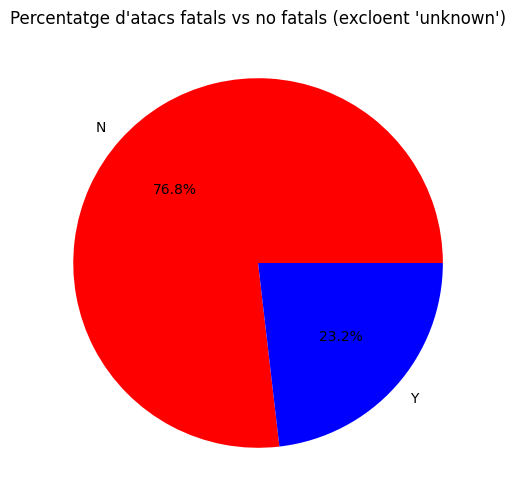

In [58]:
df_filtered = df[df['fatal_y_n'].str.upper().isin(['Y', 'N'])]
fatal_counts = df_filtered['fatal_y_n'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fatal_counts, labels=fatal_counts.index, autopct='%1.1f%%', colors=['red', 'blue'])
plt.title("Percentatge d'atacs fatals vs no fatals")
plt.show()